In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rc
from daft import PGM, Node, Plate

In [3]:
rc("font", family="serif", size=12)
rc("text", usetex=True)
pgm = PGM([6, 5.2], origin=[0., 0.2], observed_style='inner')

In [4]:
# Cosmological parameters on top line
pgm.add_node(Node("cosmology", r"$\Omega_M$", 2, 5))

# Nuisance parameters on top line
pgm.add_node(Node("alpha_beta", r"$\alpha, \beta$", 3, 5))
pgm.add_node(Node("absolute_mag", r"$M_B$", 4, 5))

In [5]:
# Big Plate: Samples
pgm.add_plate(Plate([0.5, 0.5, 5, 4.],
                    label=r"Samples $j = 1, \cdots, N_{\rm samp}$",
                    shift=-0.1))

In [6]:
#  x_1, c, and sigma_int distributions in samples plate
pgm.add_node(Node("x1dist", r"$x_1^{\mathrm{dist}}$", 1, 4))
pgm.add_node(Node("cdist", r"$c^{\mathrm{dist}}$", 5, 4))

pgm.add_node(Node("sigdist", r"$\sigma_{\mathrm{int}}^{\mathrm{dist}}$",1, 2.5))

In [7]:
# Small Plate: SNe
pgm.add_plate(Plate([1.5, 1., 3., 3.],
                    label=r"SNe $i = 1, \cdots, N_{\rm SN}$",
                    shift=-0.1))

In [8]:
# Per-SN parameters:  top line in the plate
pgm.add_node(Node("x1itrue", r"$x_{1,i}^\mathrm{true}$", 2, 3.5))
pgm.add_node(Node("citrue", r"$c_i^\mathrm{true}$", 4, 3.5))

In [9]:
# Per-SN parameters: 
pgm.add_node(Node("mB", r"$m_{B,i}$", 3, 3.2, fixed=True, offset = (-17,-17)))
pgm.add_node(Node("mBtrue", r"$m_{B,i}^{\mathrm{true}}$", 3, 2.5))

In [10]:
# Per-SN parameters: Observed parameters in bottom line of SNe plate
# redshift
pgm.add_node(Node("zi", r"$z_i$", 4, 1.5, observed=True))

# observed data: m_B, x_1, c
pgm.add_node(Node("data", r"$\mathrm{data}^{\mathrm{obs}}_i$", 2.5, 1.5,aspect=2.0, observed=True))

In [11]:
# Add in the edges.
pgm.add_edge("x1dist", "x1itrue")
pgm.add_edge("cdist", "citrue")


pgm.add_edge("x1itrue", "mB")
pgm.add_edge("citrue", "mB")

pgm.add_edge("cosmology", "mB")
pgm.add_edge("alpha_beta", "mB")
pgm.add_edge("absolute_mag", "mB")

pgm.add_edge("zi", "mB")

pgm.add_edge("mB", "mBtrue")

pgm.add_edge("sigdist", "mBtrue")

pgm.add_edge("mBtrue", "data")


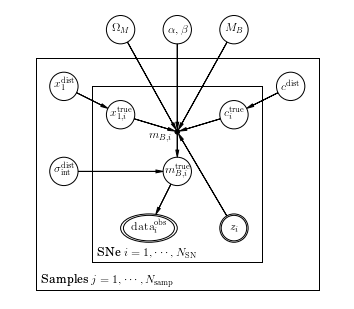

In [12]:
# Render and save.
pgm.render()
#pgm.figure.savefig("snpgm_basic.png", dpi=150)